In [1]:
# !pip install nltk
# !pip install networkx

In [2]:
# Graph
import networkx as nx
import pandas as pd

# Wordcloud
import os

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords

# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

## Graph

In [3]:
distances = pd.read_csv('distances.csv')
distances.head()

actor_start_name  actor_start_link     actor_end_name    actor_end_link  \
0     Dwayne Johnson  /name/nm0425005/    Chris Hemsworth  /name/nm1165110/   
1    Chris Hemsworth  /name/nm1165110/     Dwayne Johnson  /name/nm0425005/   
2     Dwayne Johnson  /name/nm0425005/  Robert Downey Jr.  /name/nm0000375/   
3  Robert Downey Jr.  /name/nm0000375/     Dwayne Johnson  /name/nm0425005/   
4     Dwayne Johnson  /name/nm0425005/       Akshay Kumar  /name/nm0474774/   

   distance  
0         2  
1         2  
2         2  
3         2  
4         2

In [4]:
edge_colors = {
    1: 'green',
    2: 'blue',
    3: 'red'
}

In [5]:
G = nx.Graph()

for _, row in distances.iterrows():
    start = row['actor_start_name']
    end = row['actor_end_name']
    G.add_node(start)
    G.add_node(end)
    G.add_edge(start, end, distance=row['distance'], color=edge_colors.get(row['distance']))
    
POS = nx.shell_layout(G)

In [6]:
def draw_graph(graph, distance=None, pos=None):
    edgelist = graph.edges
    
    if distance:
        edgelist = [edge for edge in edgelist if graph.edges[edge]['distance'] == distance]
    if not pos:
        pos = nx.random_layout(graph)
    
    nx.draw_networkx_nodes(graph, pos=pos, node_size=100, node_shape='.', node_color='darkblue',
                           margins=(0.1, 0.05),
                           label="Actor's graph" + f'with distance={distance}' if distance else '')
    nx.draw_networkx_labels(graph, pos=pos, labels={n: n for n in graph}, font_size=10,
                            verticalalignment='bottom')
    
    nx.draw_networkx_edges(graph, pos=pos, edgelist=edgelist, width=0.5,
                           edge_color=[graph.edges[edge]['color'] for edge in edgelist])
    nx.draw_networkx_edge_labels(graph, pos=pos, font_size=6,
                                 edge_labels={edge: graph.edges[edge]['distance'] for edge in edgelist})

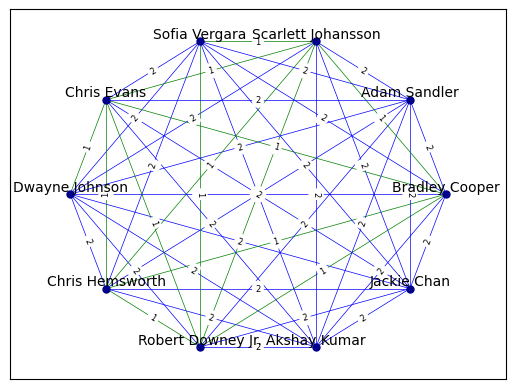

In [7]:
draw_graph(G, pos=POS)

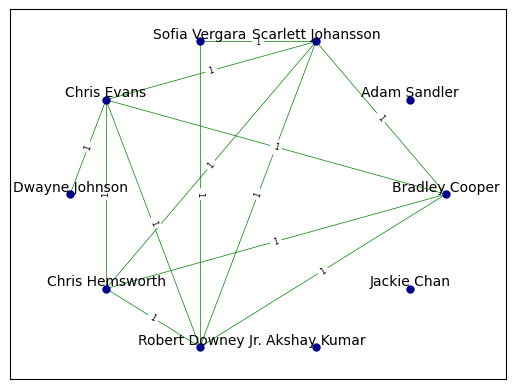

In [8]:
draw_graph(G, 1, pos=POS)

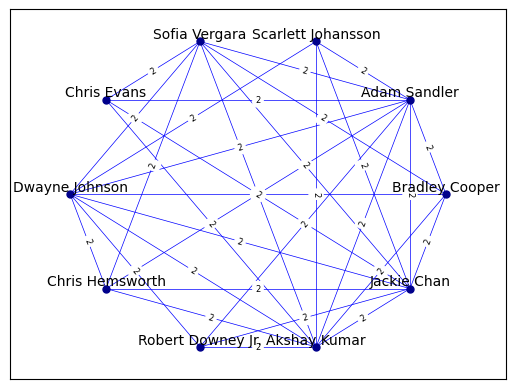

In [9]:
draw_graph(G, 2, pos=POS)

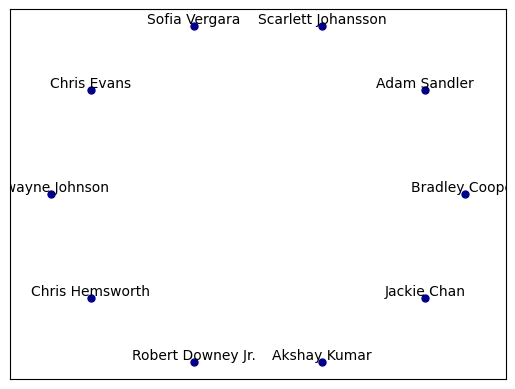

In [10]:
draw_graph(G, 3, pos=POS)

## Wordcloud

In [11]:
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(["n't", "U"])

WNL = WordNetLemmatizer()

In [12]:
def get_descriptions_from_file(actor_name: str):
    if not os.path.exists(actor_name + '.txt'):
        print(f'FILE {actor_name}.txt NOT FOUND')
        return
    
    with open(actor_name + '.txt') as file:
        actor_descriptions = file.read()
    # print(f"Got {len(set(actor_descriptions.split()))} unique raw words")
    return actor_descriptions

In [13]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

In [14]:
def preprocess_descriptions(actor_descriptions: str):
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(actor_descriptions))
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    
    lemmatized_descriptions = []
    for word, tag in wordnet_tagged:
        if not tag:
            lemmatized_descriptions.append(word)
        else:       
            lemmatized_descriptions.append(WNL.lemmatize(word, tag))
    
    # print(f"Got {len(set(lemmatized_descriptions))} unique lemmatized words")
    lemmatized_descriptions = " ".join(lemmatized_descriptions)
    
    return lemmatized_descriptions

In [15]:
def draw_wordcloud(descriptions, actor_name=None):
    wordcloud = WordCloud(width=800, height=300, max_words=500, min_font_size=8, max_font_size=64,
                          colormap='inferno', stopwords=STOPWORDS, background_color="white"
                         ).generate(descriptions)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    if actor_name:
        plt.title(f"{actor_name}'s wordcloud", fontdict={'fontsize': 20})
    plt.axis("off")
    plt.show()

In [16]:
def main(actor_name):
    descriptions = get_descriptions_from_file(actor_name)
    lemmatized_descriptions = preprocess_descriptions(descriptions)
    draw_wordcloud(lemmatized_descriptions, actor_name)

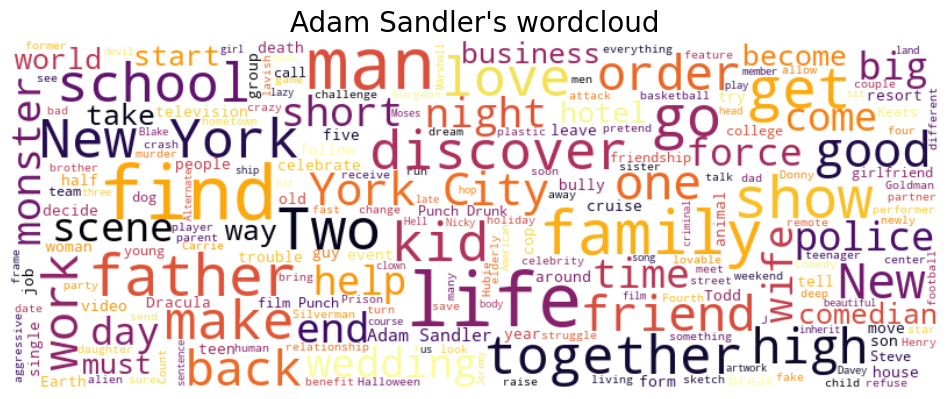

In [17]:
main('Adam Sandler')

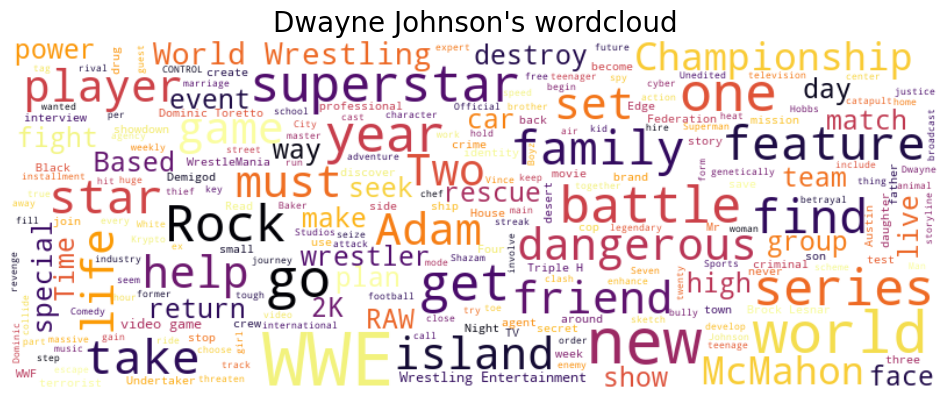

In [18]:
main('Dwayne Johnson')

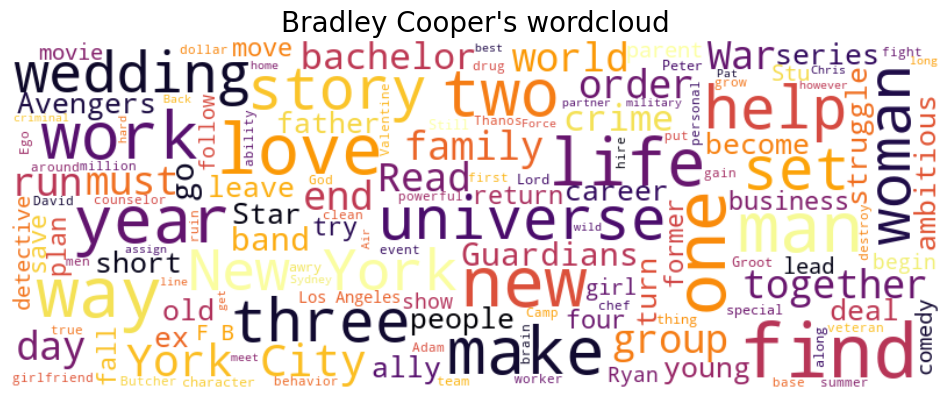

In [19]:
main('Bradley Cooper')

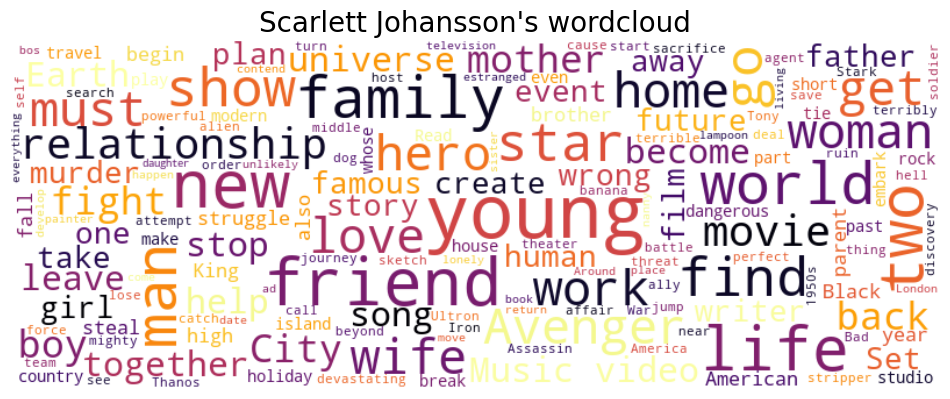

In [20]:
main('Scarlett Johansson')

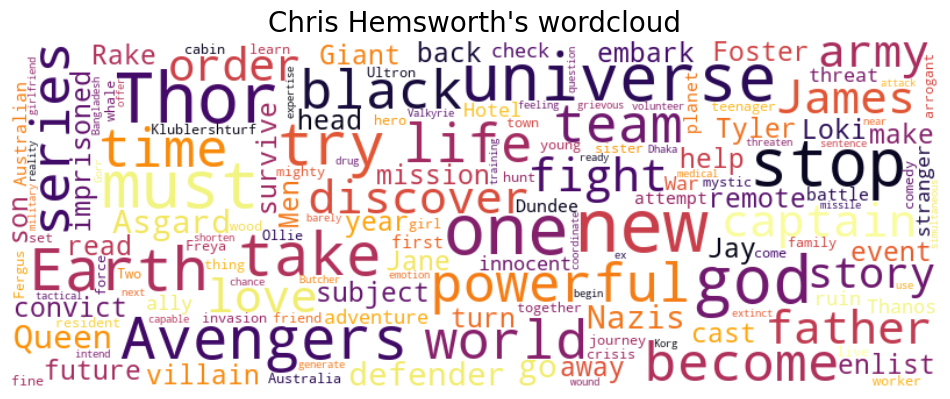

In [21]:
main('Chris Hemsworth')

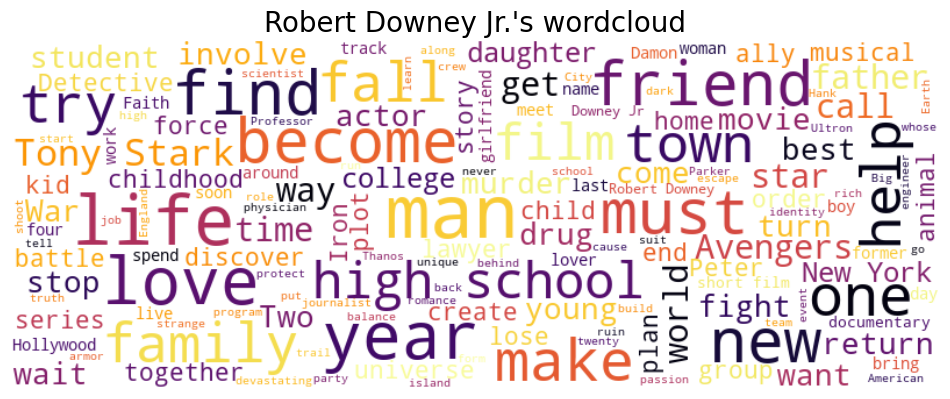

In [22]:
main('Robert Downey Jr.')

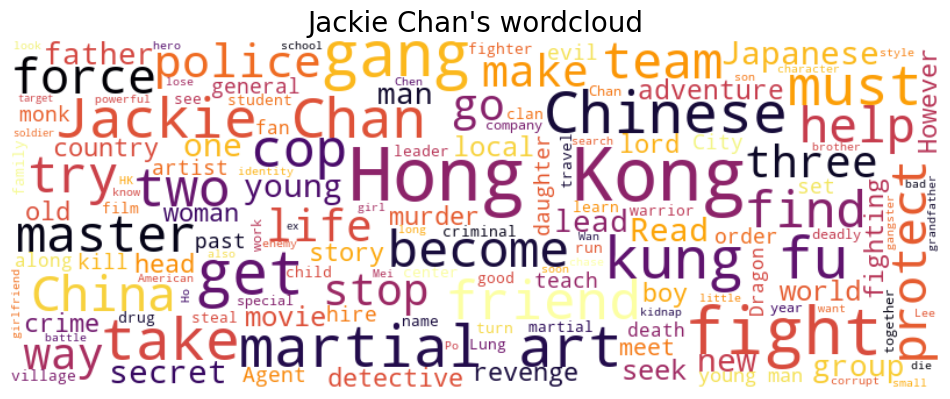

In [23]:
main('Jackie Chan')

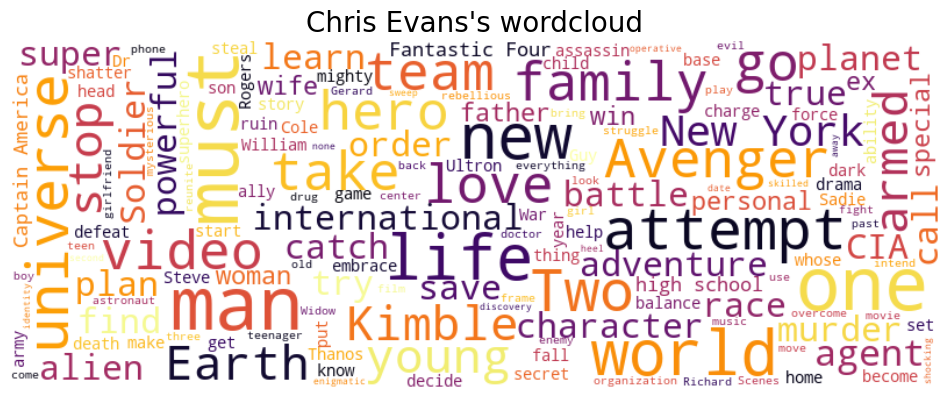

In [24]:
main('Chris Evans')

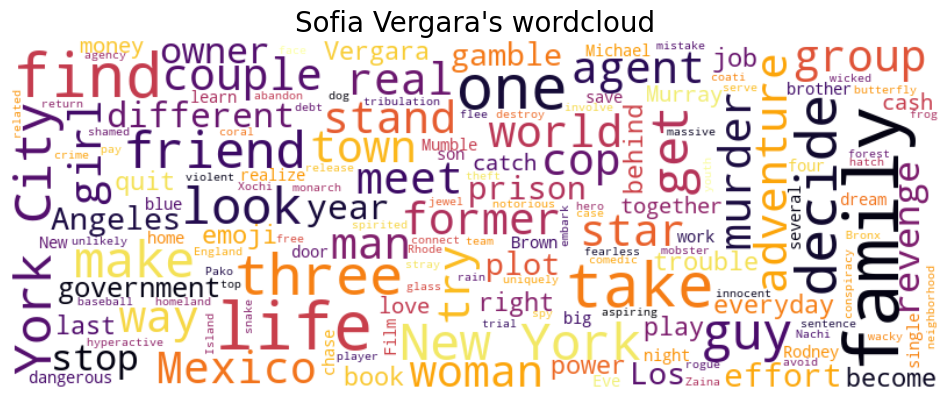

In [25]:
main('Sofia Vergara')

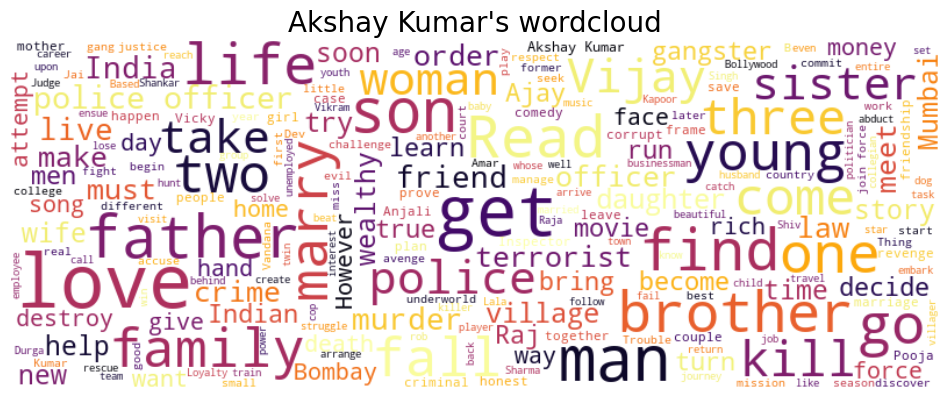

In [26]:
main('Akshay Kumar')